In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
%matplotlib inline
sns.set(rc={'figure.figsize':(13,10)})

#### For ML 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
pio.templates.default = "plotly_dark"

In [4]:
data=pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#### Data Description

In [5]:
data.shape

(2000, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
data.duplicated().any()

False

#### The target variable is the price range of the mobile. There are 4 categories in total, Cheap(0), Medium(1), Expensive() and Very Expensive(3).

In [10]:
data['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [11]:
corr=data.corr()
np.fill_diagonal(corr.values, 0)
corr.replace(0, np.nan, inplace=True)
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,NaN,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,NaN,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,NaN,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,NaN,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,NaN,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,NaN,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,NaN,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,NaN,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,NaN,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,NaN,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

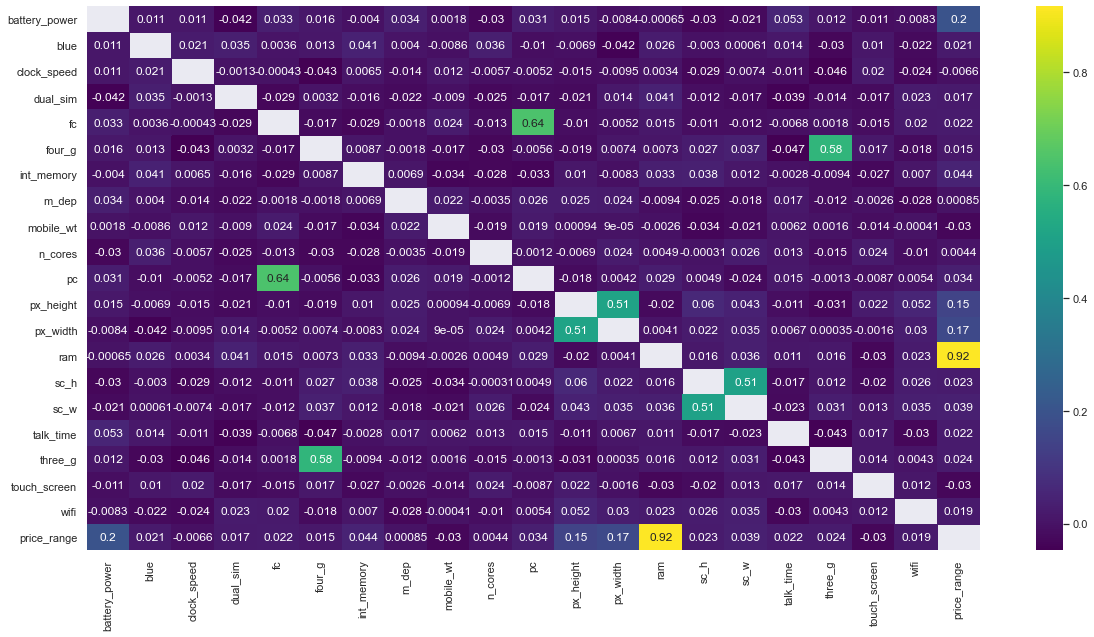

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='viridis')

#### We have the Heatmap, now we need to find variables with highest correlation between them

In [13]:
corr.unstack().sort_values(kind='quicksort', na_position='first').drop_duplicates(keep='last')

price_range  price_range         NaN
talk_time    four_g        -0.046628
three_g      clock_speed   -0.046433
clock_speed  four_g        -0.043073
talk_time    three_g       -0.042688
                              ...   
sc_w         sc_h           0.506144
px_width     px_height      0.510664
three_g      four_g         0.584246
pc           fc             0.644595
price_range  ram            0.917046
Length: 211, dtype: float64

#### Price Range has the highest correlation with RAM

#### Since the target variable is Price Range, we need to find the features that highly correlate with it

In [14]:
corr.abs()['price_range'].sort_values(ascending=False)

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
price_range           NaN
Name: price_range, dtype: float64

#### Data Visualizations

In [15]:
fig=px.histogram(data, x='ram', opacity=1,color_discrete_sequence=['LightSkyBlue'])
fig.update_layout(bargap=0.1)

#### When RAM increases the Price Range also increases

In [16]:
px.scatter(data, x="ram", y="price_range", trendline="ols",color_discrete_sequence=['palegreen'])

In [17]:
px.box(data, y='battery_power', x='price_range', color='price_range')

In [18]:
cores=data['n_cores'].value_counts().sort_index()
cores

1    242
2    247
3    246
4    274
5    246
6    230
7    259
8    256
Name: n_cores, dtype: int64

##### Donut Chart showing no.of phones per cores

In [19]:
fig = go.Figure(data=[go.Pie(labels=['1 Core','2 Cores','3 Cores','4 Cores','5 Cores','6 Cores','7 Cores','8 Cores'],
                             values=cores, hole=0.4)])
fig.update_traces(hoverinfo='label', textinfo='value', textfont_size=12,
                  marker=dict(line=dict(color='#FFFFFF', width=0.5)))

#### 3D- Scatter Plot to show the highest correlated features (RAM, Battery Power, px_width) 

In [20]:
fig=px.scatter_3d(data, x='ram',y='battery_power',z='px_width',color='price_range')
fig.show()

#### Training the Data

In [21]:
X= data.drop('price_range',axis=1)
y=data['price_range']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=100)

In [23]:
models={'KNN': KNeighborsClassifier(),'Linear Regression':LinearRegression(),'Random Forest':RandomForestClassifier()}

def train_models(models, X_train, X_test, y_train, y_test):
    np.random.seed(40)
    accuracy={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        accuracy[name]=model.score(X_test, y_test)
        
    return accuracy

In [24]:
accuracy=train_models(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
accuracy

{'KNN': 0.9196969696969697,
 'Linear Regression': 0.9180227315049908,
 'Random Forest': 0.8681818181818182}

#### Comapre the Accuracies of The Models

In [25]:
x_val=list(accuracy.keys())
y_val=list(accuracy.values())
fig=go.Figure(data=[go.Bar(x=x_val,y=y_val, hovertext=['91.9% Accurate', '91.8% Accurate', '86.8% Accurate'])])
fig.update_layout(title_text='Accuracies of the ML Models')
fig.show()

#### KNN is the most Accurate out of the Three Models
##### We can check and try to increase the accuracy of the model using hyperparameter tuning

In [26]:
train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [27]:
scores=pd.DataFrame({'Train Scores':train_scores,
                    'Test Scores':test_scores})
fig=go.Figure()
fig.update_layout(title='Comparison of Test and Training Scores',xaxis=dict(title='Neighbor(s)',tickmode='linear'),yaxis=dict(title='Score'))
fig.add_trace(go.Scatter(x=list(neighbors),y=scores['Train Scores'],mode='lines+markers',name='Train Scores'))
fig.add_trace(go.Scatter(x=list(neighbors),y=scores['Test Scores'],mode='lines+markers',name='Test Scores'))
fig.show()

#### Let's Fit the Model with the correct Parameter

In [28]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'KNN Accuracy: {knn.score(X_test, y_test) * 100} %')

KNN Accuracy: 92.42424242424242 %


In [46]:
from sklearn.metrics import classification_report
clf=classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       178
           1       0.91      0.90      0.90       163
           2       0.87      0.88      0.88       161
           3       0.95      0.93      0.94       158

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660

